a.

In [1]:
import numpy as np

# CONDIÇÕES DE FRONTEIRA

def f_1(x): # LEFT
    return 0

def f_2(x): # RIGHT
    return 0

def f_3(x): # TOP
    return 0

def f_4(y): # BOTTOM
    return 0

# EQ DE POISSON (Δu = f_0(x,y))

def f_0(x,y):
    alpha = 0.01
    return (-1/alpha)*np.sin(x*np.pi)*np.sin(y*np.pi)

# 

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t, h

# CONSTANTES

xmin = 0
xmax = 1
tmin = 0
tmax = 1

n = 19
m = 19

x,h = part(n+1, xmin, xmax)
y,k = part(m+1, tmin, tmax)

v = k**2/h**2
l = 2*(v + 1)


# SOLUÇÃO INICIAL
SOLUTION = np.zeros((m+2,n+2))

SOLUTION[0:,0] = np.flip(f_1(y))
SOLUTION[0:,n+1] = np.flip(f_2(y))
SOLUTION[0,0:] = f_3(x)
SOLUTION[m+1,0:] = f_4(x)

# CONSTRUÇÃO DA MATRIZ DE COEFICIENTES
L_BLOCK = np.zeros((n,n))
for i in range (len(L_BLOCK)):
    L_BLOCK[i,i] = l
    if i-1 >= 0:
        L_BLOCK[i,i-1] = -1
        
    if i+1 < len(L_BLOCK):
        L_BLOCK[i,i+1] = -1
        

MATRIX = np.zeros((m*n,m*n))
for i in range(len(MATRIX)//len(L_BLOCK)):
    MATRIX[0+n*i:n+n*i,0+n*i:n+n*i] = L_BLOCK
    
    
M_BLOCK = -v*np.eye(n) 
for i in range(len(MATRIX)//len(M_BLOCK)):
    if i == 0:
        MATRIX[0:n,n:2*n] = M_BLOCK
        
    elif i == len(MATRIX)//len(M_BLOCK) - 1:
        MATRIX[i*n:(i+1)*n,(i-1)*n:i*n] = M_BLOCK
        
    else:
        MATRIX[i*n:(i+1)*n,(i+1)*n:(i+2)*n] = M_BLOCK
        MATRIX[i*n:(i+1)*n,(i-1)*n:i*n] = M_BLOCK

# CONSTRUÇÃO DA MATRIZ B
B = np.zeros((m*n, 1))
for k in range(m):
    C = np.zeros((n, 1))
    for i in range(n):
        if k == 0:
            C[i] += v * SOLUTION[k, i+1]
            
        if k == m - 1:
            C[i] += v * SOLUTION[k+2, i+1]
            
        if i == 0:
            C[i] += SOLUTION[k+1, 0]
            
        if i == n - 1:
            C[i] += SOLUTION[k+1, n+1]
            
    B[k*n:(k+1)*n] = C
    
F = np.zeros((n*m,1))
for j in range(m):
    C = np.zeros((n,1))
    for i in range(n):
        C = f_0(x[i], y[j])
        
    F[j*n:(j+1)*n] = C
    
    
F *= -h**2
B += F    
    
K = np.linalg.solve(MATRIX,B)
X = np.reshape(K,(m,n))

SOLUTION[1:m+1,1:n+1] = X

# print(SOLUTION)



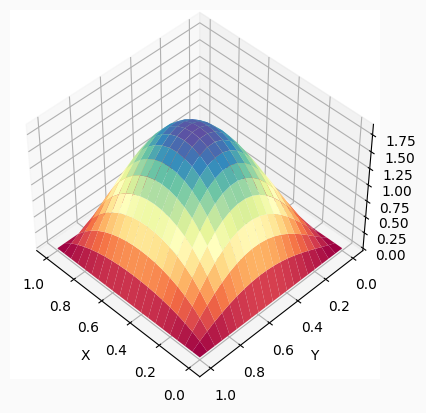

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rows, cols = SOLUTION.shape
x = np.linspace(0, 1, cols)
y = np.linspace(0, 1, rows)
X, Y = np.meshgrid(x, y)

# Plot
fig = plt.figure(facecolor='#fafafa')  # Set the background color
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, SOLUTION, cmap='Spectral')

# Set the viewing angle (elevation, azimuth)
ax.view_init(elev=45, azim=135)

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# Add a color bar which maps values to colors.
# fig.colorbar(surf)

plt.savefig("difusão.pdf", bbox_inches='tight', facecolor='#fafafa')
plt.show()

b.

In [3]:
import numpy as np

# CONDIÇÕES DE FRONTEIRA

def f_1(x): # LEFT
    return 0

def f_2(x): # RIGHT
    return 0

def f_3(x): # TOP
    return 0

def f_4(y): # BOTTOM
    return 0

# EQ DE POISSON (Δu = f_0(x,y))

def f_0(x,y):
    alpha = 0.009
    return (-1/alpha)*np.sin(x*np.pi)*np.sin(y*np.pi)

# BARREIRA  

def g(x,y):
    # REGIÃO : [1/3, 2/3] x [1/3, 2/3]
    
    if x >= 1/3 and x <= 2/3 and y >= 1/3 and y <= 2/3:
        return 1
    else:
        return 0

# 

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t, h

# CONSTANTES

xmin = 0
xmax = 1
tmin = 0
tmax = 1

n = 29
m = 29

x,h = part(n+1, xmin, xmax)
y,k = part(m+1, tmin, tmax)

v = k**2/h**2
l = 2*(v + 1)


# SOLUÇÃO INICIAL
SOLUTION = np.zeros((m+2,n+2))

SOLUTION[0:,0] = np.flip(f_1(y))
SOLUTION[0:,n+1] = np.flip(f_2(y))
SOLUTION[0,0:] = f_3(x)
SOLUTION[m+1,0:] = f_4(x)

# CONSTRUÇÃO DA MATRIZ DE COEFICIENTES
L_BLOCK = np.zeros((n,n))
for i in range (len(L_BLOCK)):
    L_BLOCK[i,i] = l
    if i-1 >= 0:
        L_BLOCK[i,i-1] = -1
        
    if i+1 < len(L_BLOCK):
        L_BLOCK[i,i+1] = -1
        

MATRIX = np.zeros((m*n,m*n))
for i in range(len(MATRIX)//len(L_BLOCK)):
    MATRIX[0+n*i:n+n*i,0+n*i:n+n*i] = L_BLOCK
    
    
M_BLOCK = -v*np.eye(n) 
for i in range(len(MATRIX)//len(M_BLOCK)):
    if i == 0:
        MATRIX[0:n,n:2*n] = M_BLOCK
        
    elif i == len(MATRIX)//len(M_BLOCK) - 1:
        MATRIX[i*n:(i+1)*n,(i-1)*n:i*n] = M_BLOCK
        
    else:
        MATRIX[i*n:(i+1)*n,(i+1)*n:(i+2)*n] = M_BLOCK
        MATRIX[i*n:(i+1)*n,(i-1)*n:i*n] = M_BLOCK

# CONSTRUÇÃO DA MATRIZ B
B = np.zeros((m*n, 1))
for k in range(m):
    C = np.zeros((n, 1))
    for i in range(n):
        if k == 0:
            C[i] += v * SOLUTION[k, i+1]
            
        if k == m - 1:
            C[i] += v * SOLUTION[k+2, i+1]
            
        if i == 0:
            C[i] += SOLUTION[k+1, 0]
            
        if i == n - 1:
            C[i] += SOLUTION[k+1, n+1]
            
    B[k*n:(k+1)*n] = C
    
F = np.zeros((n*m,1))
for j in range(m):
    C = np.zeros((n,1))
    for i in range(n):
        C = f_0(x[i], y[j])
        
    F[j*n:(j+1)*n] = C
    
    
F *= -h**2
B += F    
    
K = np.linalg.solve(MATRIX,B)
Z = np.reshape(K,(m,n))

grid = np.zeros((m, n, 2))
for i in range(m):
    for j in range(n):
        grid[i, j] = [i / (m - 1), j / (n - 1)]
        
for i in range(m):
    for j in range(n):
        if grid[i,j,0] >= 1/3 and grid[i,j,0] <= 2/3 and grid[i,j,1] >= 1/3 and grid[i,j,1] <= 2/3:
            if Z[i,j] >= 1:
                Z[i,j] = 1
        



SOLUTION[1:m+1,1:n+1] = Z

# print(SOLUTION)



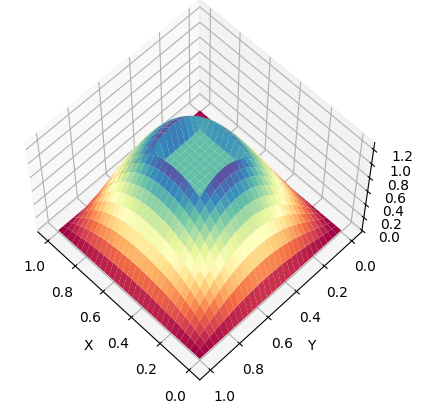

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rows, cols = SOLUTION.shape
x = np.linspace(0, 1, cols)
y = np.linspace(0, 1, rows)
X, Y = np.meshgrid(x, y)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, SOLUTION, cmap='Spectral')

# Set the viewing angle (elevation, azimuth)
ax.view_init(elev=60, azim=135)

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# Add a color bar which maps values to colors.
# fig.colorbar(surf)

plt.savefig("difusão_barreira.pdf", bbox_inches='tight', facecolor='#fafafa')
plt.show()

In [5]:
# gerando os pontos para plotar no pgfplots (latex)
grid = np.zeros((m+2, n+2, 2))
for i in range(m+2):
    for j in range(n+2):
        grid[i, j] = [i / (m+1), j / (n+1)]

for j in range(n+2):
    for i in range(m+2):
        print(f"{grid[i,j,0]:.5f} {grid[i,j,1]:.5f} {SOLUTION[i,j]:.5f}")
    print("")

0.00000 0.00000 0.00000
0.03333 0.00000 0.00000
0.06667 0.00000 0.00000
0.10000 0.00000 0.00000
0.13333 0.00000 0.00000
0.16667 0.00000 0.00000
0.20000 0.00000 0.00000
0.23333 0.00000 0.00000
0.26667 0.00000 0.00000
0.30000 0.00000 0.00000
0.33333 0.00000 0.00000
0.36667 0.00000 0.00000
0.40000 0.00000 0.00000
0.43333 0.00000 0.00000
0.46667 0.00000 0.00000
0.50000 0.00000 0.00000
0.53333 0.00000 0.00000
0.56667 0.00000 0.00000
0.60000 0.00000 0.00000
0.63333 0.00000 0.00000
0.66667 0.00000 0.00000
0.70000 0.00000 0.00000
0.73333 0.00000 0.00000
0.76667 0.00000 0.00000
0.80000 0.00000 0.00000
0.83333 0.00000 0.00000
0.86667 0.00000 0.00000
0.90000 0.00000 0.00000
0.93333 0.00000 0.00000
0.96667 0.00000 0.00000
1.00000 0.00000 0.00000

0.00000 0.03333 0.00000
0.03333 0.03333 0.01818
0.06667 0.03333 0.03750
0.10000 0.03333 0.05720
0.13333 0.03333 0.07682
0.16667 0.03333 0.09599
0.20000 0.03333 0.11442
0.23333 0.03333 0.13185
0.26667 0.03333 0.14802
0.30000 0.03333 0.16274
0.33333 0.03333